In [5]:
import sys
sys.path.append("..")

from utils import *

# Chikwadraattoetsen

## Toepassing 1: onafhankelijkheidstoets van twee categorische variabelen

In [19]:
# Genereer LaTeX-tabellen
def dataframe_naar_latex(df, titel):
    print("Hallo:", df.to_latex())
    
    latex_code = f"""
        \\begin{{table}}[H]
            \\centering
            \\caption{{{titel}}}
                {df.to_latex(escape=False)}
        \\end{{table}}
    """
    return latex_code

def generate_latex_tables_chi2_onafhankelijkheid(matrix, row_names=None, col_names=None):
    # Transform the numpy array to a pandas DataFrame
    observed_df = pd.DataFrame(matrix,
                            index=row_names if row_names else [f"$R_{i+1}$" for i in range(matrix.shape[0])],
                            columns=col_names if col_names else [f"$C_{j+1}$" for j in range(matrix.shape[1])]
    )
    chi2, p, dof, expected = chi2_contingency(matrix, correction=False)

    print(chi2, p, dof, expected)
    expected_df = pd.DataFrame(expected, index=observed_df.index, columns=observed_df.columns)
    nrows, ncols = expected_df.shape
    
    latex_code = f"""
        \\begin{{minipage}}{{0.45\\textwidth}}
    """

    for i in range(nrows):
        
            {dataframe_naar_latex(observed_df, "Geobserveerde frequenties")}
        \\end{{minipage}}
        \\hfill
        \\begin{{minipage}}{{0.45\\textwidth}}
            {dataframe_naar_latex(expected_df, "Verwachte frequenties (expected)")}
        \\end{{minipage}}
    """
    return latex_code

In [21]:
matrix = np.array([
    [52, 22],
    [23, 9],
    [17, 11],
    [38, 28]
])
row_names = ["Leiderschap", "Avontuur", "Doorgroeimogelijkheden", "Vaderland dienen"]
col_names = ["Cadetten", "Adelborsten"]
print(generate_latex_tables_chi2_onafhankelijkheid(matrix, row_names, col_names))

3.3934373220087486 0.3348481926181516 3 [[48.1 25.9]
 [20.8 11.2]
 [18.2  9.8]
 [42.9 23.1]]
Hallo: \begin{tabular}{lrr}
\toprule
 & Cadetten & Adelborsten \\
\midrule
Leiderschap & 52 & 22 \\
Avontuur & 23 & 9 \\
Doorgroeimogelijkheden & 17 & 11 \\
Vaderland dienen & 38 & 28 \\
\bottomrule
\end{tabular}

Hallo: \begin{tabular}{lrr}
\toprule
 & Cadetten & Adelborsten \\
\midrule
Leiderschap & 48.100000 & 25.900000 \\
Avontuur & 20.800000 & 11.200000 \\
Doorgroeimogelijkheden & 18.200000 & 9.800000 \\
Vaderland dienen & 42.900000 & 23.100000 \\
\bottomrule
\end{tabular}


        \begin{minipage}{0.45\textwidth}
            
        \begin{table}[H]
            \centering
            \caption{Geobserveerde frequenties}
                \begin{tabular}{lrr}
\toprule
 & Cadetten & Adelborsten \\
\midrule
Leiderschap & 52 & 22 \\
Avontuur & 23 & 9 \\
Doorgroeimogelijkheden & 17 & 11 \\
Vaderland dienen & 38 & 28 \\
\bottomrule
\end{tabular}

        \end{table}
    
        \end{minipage}
 

## Toepassing 2: aanpassingstoets (goodness-of-fit test)

In [75]:
def generate_latex_table_chi2_aanpassing(categories, observed, expected):
    """
    Genereert een LaTeX-tabel met drie kolommen: Categorie, Observed, Expected.

    Parameters:
    - categories: lijst van labels of namen van wat gemeten wordt.
    - observed: lijst van geobserveerde waarden.
    - expected: lijst van verwachte waarden.

    Returns:
    - Een string met de LaTeX-tabelcode.
    """    
    latex_code = f"""
        \\begin{{tabular}}{{lrr}}
            \\toprule
                \\textbf{{Categorie}} & \\textbf{{Observed}} & \\textbf{{Expected}} \\
            \\midrule
    """
    for cat, obs, exp in zip(categories, observed, expected):
        latex_code += f"\t\t{cat} & ${obs}$ & ${pretty_print(exp)}$ \\\\\n"

    latex_code += f"""
        \\bottomrule
    \\end{{tabular}}
    """
    return latex_code

def generate_latex_calculation_chi2_aanpassing(categories, observed, expected):
    """
    Genereert een LaTeX-berekening met Observed, Expected.

    Parameters:
    - categories: lijst van categorieen.
    - observed: lijst van geobserveerde waarden.
    - expected: lijst van verwachte waarden.

    Returns:
    - Een string met de LaTeX-berekeningscode.
    """
    latex_code = f"""
        \\begin{{align*}}
    """    

    general_formula = " + ".join([f"\\frac{{(O_{{{cat}}} - E_{{{cat}}})^2}}{{E_{{{cat}}}}}" for cat in categories])
    filled_in_formula = " + ".join([f"\\frac{{({pretty_print(observed[i])} - {pretty_print(expected[i])})^2}}{{{pretty_print(expected[i])}}}" for i in range(len(observed))])
    result = np.sum((observed - expected) ** 2 / expected) 
    latex_code += f"""
        \\chi^2 &= {general_formula}\\\\
                &= {filled_in_formula}\\\\
                &\\approx {pretty_print(result)}
    \\end{{align*}}
    """
    return latex_code, result

def chi2_aanpassing(categories, observed, expected, alpha, num_estimated_parameters=0):
    """
    Voert een chikwadraat aanpassingstoets uit.

    Parameters:
    - categories: list of array of categories
    - observed: list or array of observed frequencies
    - expected: list or array of expected frequencies (optional).
    
    Returns:
    - chi2_test_statistic: Chi-square statistic
    - p_value: corresponding p-value
    """
    categories = np.asarray(categories)
    observed = np.asarray(observed)
    expected = np.asarray(expected)

    print(f"We voeren een chikwadraat toets voor aanpassing met een significantieniveau van $\alpha = {alpha}$.")
    print(f"Allereerst berekenen we op basis van de gegeven kansverdeling de verwachte frequenties:")
    print(generate_latex_table_chi2_aanpassing(categories, observed, expected))

    print(f"Vervolgens berekenen we de toetsingsgrootheid $X^2$ als volgt:")
    latex_code, chi2_stat = generate_latex_calculation_chi2_aanpassing(categories, observed, expected)
    print(latex_code)

    p_value = 1 - chi2.cdf(chi2_stat, df=len(categories)-1-num_estimated_parameters)

    print(f"De toetsingsgrootheid $X^2$ volgt onder de nulhypothese een $\\chi^2$-verdeling met $\\text{{df}}= {len(categories)} - 1 - {num_estimated_parameters} = {len(categories)-1-num_estimated_parameters}$ vrijheidsgraden.")
    print(f"""
        \\begin{{align*}}
            p = P(\\chi^2 > {pretty_print(chi2_stat)}) &= \\chi^2\\text{{cdf}}(\\text{{lower}}={pretty_print(chi2_stat)}; \\text{{upper}}=10^{{99}}; \\text{{df}}={len(categories)-1-num_estimated_parameters}) \\\\
                                             &\\approx {pretty_print(p_value)}.   
        \\end{{align*}}"""
    )
    if p_value < alpha:
        print(f"Omdat $p < \\alpha$, wordt de nulhypothese $H_0$ verworpen.")
        print(f"Er is voldoende reden om aan te nemen dat de geobserveerde data geen realisaties van een andere kansverdeling dan de gegeven kansverdeling.")
    else:
        print(f"Omdat $p > \\alpha$, wordt de nulhypothese $H_0$ aangenomen.")
        print(f"Er is onvoldoende reden om de aanname te verwerpen dat de geobserveerde data tot stand zijn gekomen als trekkingen van de gegeven kansverdeling.")
           

    return chi2_stat, p_value



In [77]:
## DRIVER CODE ###

# Invoervariabelen
categories = np.array([0, 1, 2, 3])
observed = np.array([48, 24, 16, 12])
sum_observations = np.dot(categories, observed)
n_observations = np.sum(observed)
average_observation = sum_observations / n_observations
expected = np.array([n_observations * poisson.pmf(k=k, mu=1) for k in range(3)] + [n_observations * (1 - poisson.cdf(k=2, mu=1))])
# expected = [100 * percentage / 100 for percentage in [28, 36, 24, 12]]
alpha=0.05
num_estimated_parameters = 0

# Generate the LaTeX code for the solution
chi2_aanpassing(categories, observed, expected, alpha, num_estimated_parameters)


We voeren een chikwadraat toets voor aanpassing met een significantieniveau van $lpha = 0.05$.
Allereerst berekenen we op basis van de gegeven kansverdeling de verwachte frequenties:

        \begin{tabular}{lrr}
            \toprule
                \textbf{Categorie} & \textbf{Observed} & \textbf{Expected} \
            \midrule
    		0 & $48$ & $36.7879$ \\
		1 & $24$ & $36.7879$ \\
		2 & $16$ & $18.394$ \\
		3 & $12$ & $8.0301$ \\

        \bottomrule
    \end{tabular}
    
Vervolgens berekenen we de toetsingsgrootheid $X^2$ als volgt:

        \begin{align*}
    
        \chi^2 &= \frac{(O_{0} - E_{0})^2}{E_{0}} + \frac{(O_{1} - E_{1})^2}{E_{1}} + \frac{(O_{2} - E_{2})^2}{E_{2}} + \frac{(O_{3} - E_{3})^2}{E_{3}}\\
                &= \frac{(48 - 36.7879)^2}{36.7879} + \frac{(24 - 36.7879)^2}{36.7879} + \frac{(16 - 18.394)^2}{18.394} + \frac{(12 - 8.0301)^2}{8.0301}\\
                &\approx 10.1366
    \end{align*}
    
De toetsingsgrootheid $X^2$ volgt onder de nulhypothese een $

(10.136559809385428, 0.017440291569031263)

### Plotting functions

In [80]:
def chi2_choose_domain(df):
    if df <= 5:
        xmin = 0.001
    else:
        xmin = 0

    xmax = chi2.ppf(0.999, df=df)
    return xmin, xmax

def chi2_calculate_yaxis_ub(y, df):
    # Set the top of y-axis to enhance visibility for lower degrees of freedom
    if df <= 2:
        top = 0.5
    else:
        top = max(y) * 1.1
    return top
    
def chi2_p_value(test_statistic, alpha, df, filename):
    xmin, xmax = chi2_choose_domain(df=df)
    x = np.linspace(xmin, xmax, 1000)
    y = chi2.pdf(x, df=df)
    maxy = chi2_calculate_yaxis_ub(y, df=df)
    
    # Kansberekening
    critical_value = chi2.ppf(q=1-alpha, df=df)
    p_value = 1 - chi2.cdf(test_statistic, df=df)

    # Plot
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(x, y)

    ymin, ymax = ax.get_ylim()
    ytext, offset = get_y_annotation(ax)
    ax.set_ylim(ymin - 2 * offset, ymax)
    
    if test_statistic:
        ax.fill_between(x, y, where=(x >= test_statistic), color=primary_plot_color, alpha=0.5, label=f"$p={p_value:.4f}$")
        ax.plot([test_statistic, test_statistic], [0, chi2.pdf(test_statistic, df=df)], color=primary_plot_color, linestyle='--')
        ax.text(test_statistic, ytext, "$\\chi^2$", color=primary_plot_color, ha="center")

    ax.fill_between(x, y, where=(x >= critical_value), color=critical_color, alpha=0.5, label=f"$\\alpha={alpha}$")
    ax.plot([critical_value, critical_value], [0, chi2.pdf(critical_value, df=df)], color=critical_color, linestyle='--')
    ax.text(critical_value, ytext, "$g$", color=critical_color, ha="center")
    
    ax.set_title(f'Chikwadraatverdeling met df$={df}$ {"vrijheidsgraad" if df == 1 else "vrijheidsgraden"}')
    ax.set_xlabel('$x$')
    ax.set_ylabel('Kansdichtheid $f(x)$')
    # ax.ylim(bottom=-0.12 * maxy, top=maxy)
    plt.tight_layout()
    plt.legend()
    plt.savefig(filename, format='png')


def chi2_critical_value(test_statistic, alpha, df, filename):
    xmin, xmax = chi2_choose_domain(df=df)
    x = np.linspace(xmin, xmax, 1000)
    y = chi2.pdf(x, df=df)
    maxy = chi2_calculate_yaxis_ub(y, df=df)
    
    # Kansberekening
    critical_value = chi2.ppf(q=1-alpha, df=df)
    
    # Plot
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(x, y)
    
    ymin, ymax = ax.get_ylim()
    ytext, offset = get_y_annotation(ax)
    ax.set_ylim(ymin - 2 * offset, ymax)

    if test_statistic:
        ax.plot([test_statistic, test_statistic], [0, chi2.pdf(test_statistic, df=df)], color=primary_plot_color, linestyle='--', label=f"$\\chi^2={test_statistic:.4f}$")
        ax.text(test_statistic, ytext, "$\\chi^2$", color=primary_plot_color, ha="center")

    ax.fill_between(x, y, where=(x >= critical_value), color=critical_color, alpha=0.3, label=f"Kritiek gebied: $[g,\\infty) = [{critical_value:.4f}: \\infty)$")
    ax.plot([critical_value, critical_value], [0, chi2.pdf(critical_value, df=df)], color=critical_color, linestyle='--')
    ax.text(critical_value, ytext, "$g$", color=critical_color, ha="center")
    
    ax.set_title(f'Chikwadraatverdeling met df$={df}$ {"vrijheidsgraad" if df == 1 else "vrijheidsgraden"}')
    ax.set_xlabel('$x$')
    ax.set_ylabel('Kansdichtheid $f(x)$')
    # ax.ylim(bottom=-0.12 * maxy, top=maxy)
    
    plt.legend()
    plt.tight_layout()
    plt.savefig(filename, format='png')


### Voorbeeld gebruik

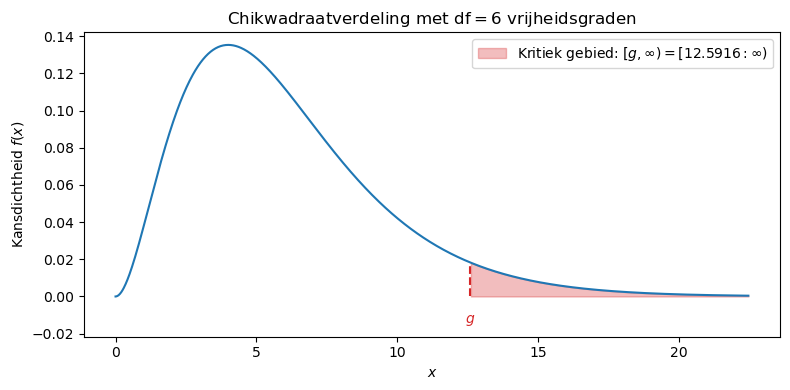

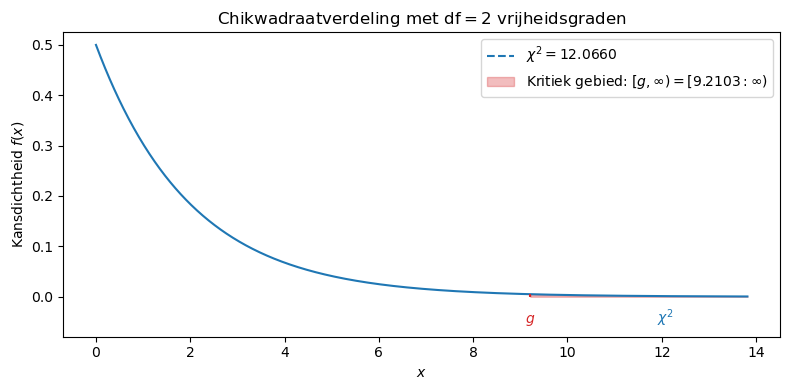

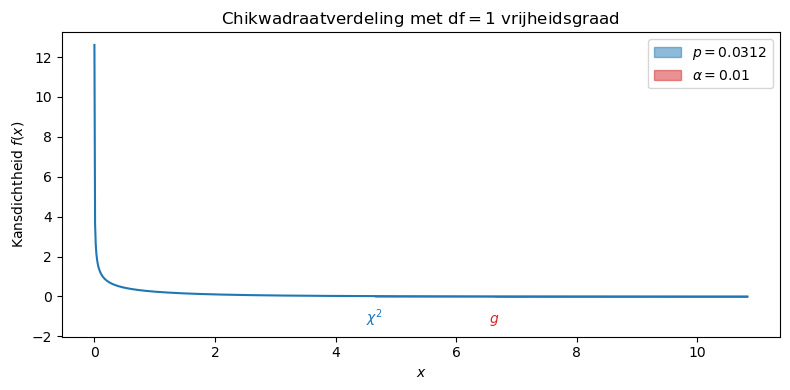

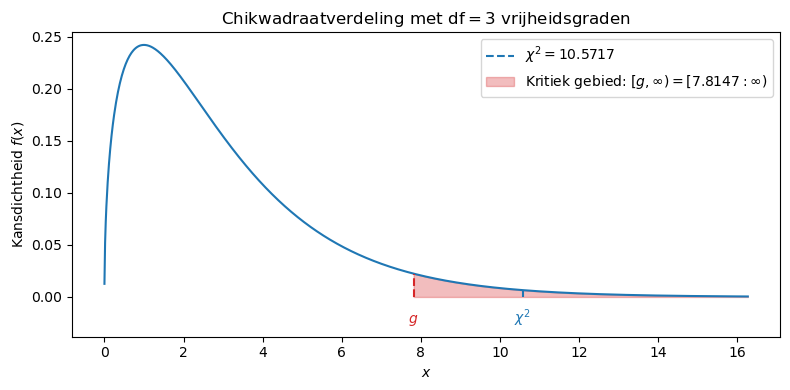

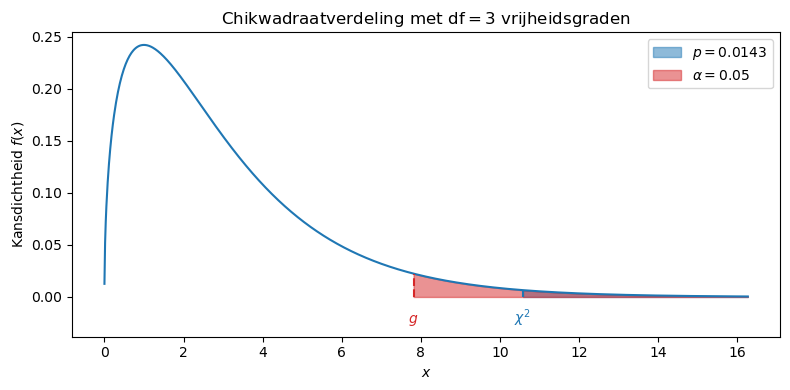

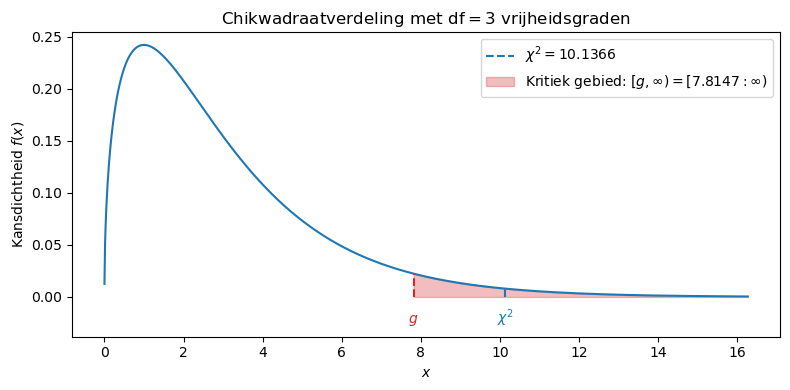

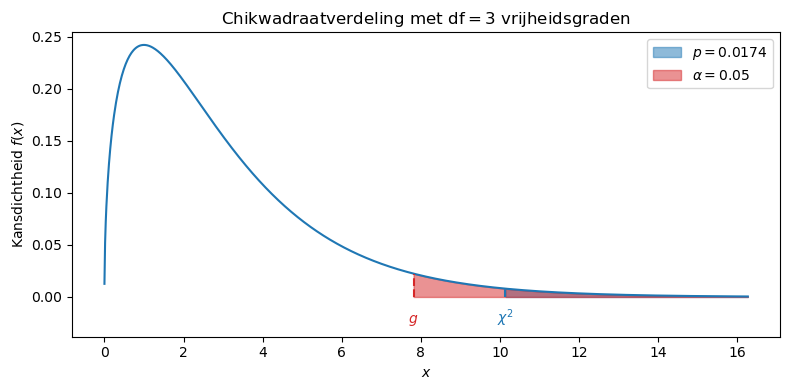

In [83]:
chi2_critical_value(test_statistic=None, alpha=0.05, df=6, filename=FIGURE_PATH + "chisq_test1.png")

chi2_critical_value(test_statistic=12.0660, alpha=0.01, df=2, filename=FIGURE_PATH + "chisq_test2.png")

chi2_p_value(test_statistic=4.6402, alpha=0.01, df=1, filename=FIGURE_PATH + "chisq_test3.png")

chi2_critical_value(test_statistic=10.5717, alpha=0.05, df=3, filename=FIGURE_PATH + "chisq_test4.png")
chi2_p_value(test_statistic=10.5717, alpha=0.05, df=3, filename=FIGURE_PATH + "chisq_test5.png")

chi2_critical_value(test_statistic=10.1366, alpha=0.05, df=3, filename=FIGURE_PATH + "chisq_test6.png")
chi2_p_value(test_statistic=10.1366, alpha=0.05, df=3, filename=FIGURE_PATH + "chisq_test7.png")